# ASSOCIATION RULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
# dataset
Retail = pd.read_excel('Online retail.xlsx')

In [2]:
Retail

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [3]:
Retail_data = Retail.iloc[:, 0].dropna().apply(lambda x: str(x).strip().split(',')).tolist()

In [4]:
Retail_data

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [5]:
from mlxtend.preprocessing import TransactionEncoder
TRANS = TransactionEncoder()
TRANS_array = TRANS.fit(Retail_data).transform(Retail_data)
Retail_TRANS = pd.DataFrame(TRANS_array, columns=TRANS.columns_)

In [6]:
Retail_TRANS

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
count = Retail_TRANS.loc[:,:].sum()
count

 asparagus             1
almonds              152
antioxydant juice     66
asparagus             35
avocado              249
                    ... 
whole wheat pasta    221
whole wheat rice     439
yams                  85
yogurt cake          205
zucchini              71
Length: 120, dtype: int64

In [8]:
Retail_TRANS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Columns: 120 entries,  asparagus to zucchini
dtypes: bool(120)
memory usage: 879.0 KB


In [9]:
frequent_itemsets = apriori(Retail_TRANS, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

     support                    itemsets
0   0.087200                   (burgers)
1   0.081067                      (cake)
2   0.060000                   (chicken)
3   0.163867                 (chocolate)
4   0.080400                   (cookies)
5   0.051067               (cooking oil)
6   0.179733                      (eggs)
7   0.079333                  (escalope)
8   0.170933              (french fries)
9   0.063200           (frozen smoothie)
10  0.095333         (frozen vegetables)
11  0.052400             (grated cheese)
12  0.132000                 (green tea)
13  0.098267               (ground beef)
14  0.076400            (low fat yogurt)
15  0.129600                      (milk)
16  0.238267             (mineral water)
17  0.065733                 (olive oil)
18  0.095067                  (pancakes)
19  0.071333                    (shrimp)
20  0.050533                      (soup)
21  0.174133                 (spaghetti)
22  0.068400                  (tomatoes)
23  0.062533    

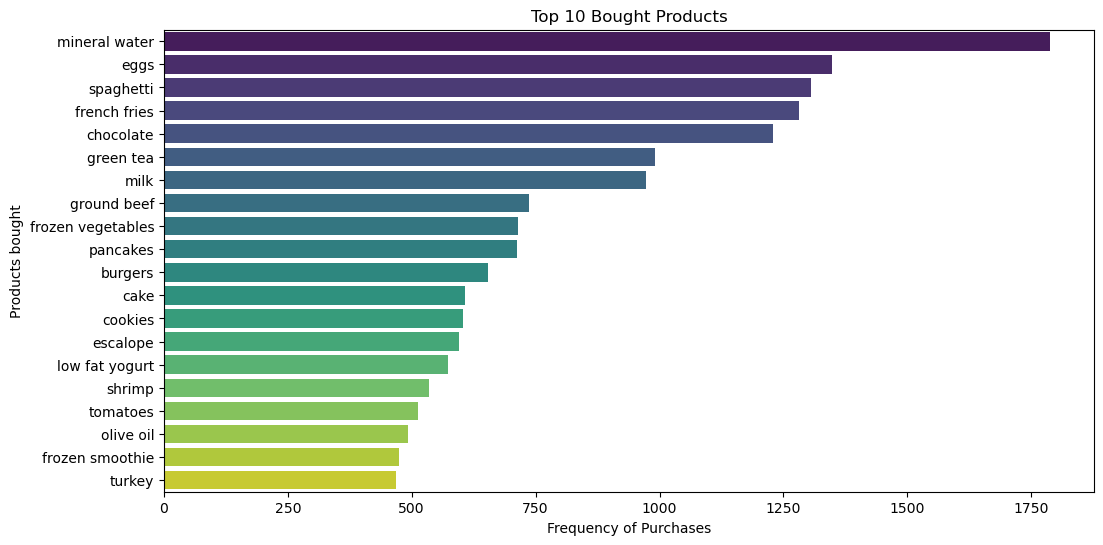

In [10]:
# Top 10 products plot
products = Retail_TRANS.sum().sort_values(ascending=False)

top_products = products.head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel('Frequency of Purchases')
plt.ylabel('Products bought')
plt.title('Top 10 Bought Products')
plt.show()

In [11]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = rules[rules['lift'] >= 1] 
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

       antecedents      consequents   support  confidence      lift
0      (chocolate)  (mineral water)  0.052667    0.321400  1.348907
1  (mineral water)      (chocolate)  0.052667    0.221041  1.348907
2           (eggs)  (mineral water)  0.050933    0.283383  1.189351
3  (mineral water)           (eggs)  0.050933    0.213766  1.189351
4      (spaghetti)  (mineral water)  0.059733    0.343032  1.439698
5  (mineral water)      (spaghetti)  0.059733    0.250699  1.439698


In [12]:
rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,1.0,0.018243,1.159468,0.369806,0.169376,0.137536,0.296866
5,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,1.0,0.018243,1.102184,0.400941,0.169376,0.092710,0.296866
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,1.0,0.013623,1.122506,0.309351,0.150706,0.109136,0.271220
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,1.0,0.013623,1.073398,0.339566,0.150706,0.068379,0.271220
2,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,1.0,0.008109,1.062957,0.194090,0.138758,0.059228,0.248574
3,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,1.0,0.008109,1.043286,0.209004,0.138758,0.041490,0.248574


In [13]:
# Example for 1
# Antecedent support - 17.4% of transactions include spaghetti
# Consequent support - 23.8% of transactions include mineral water
# Support - 5.97% of both the things been bought
# Confidence - 34.3% of who buy spaghetti but mineral water too
# Lift - 1 - 1.439 then 44 % mineral water bought also but spaghetti 

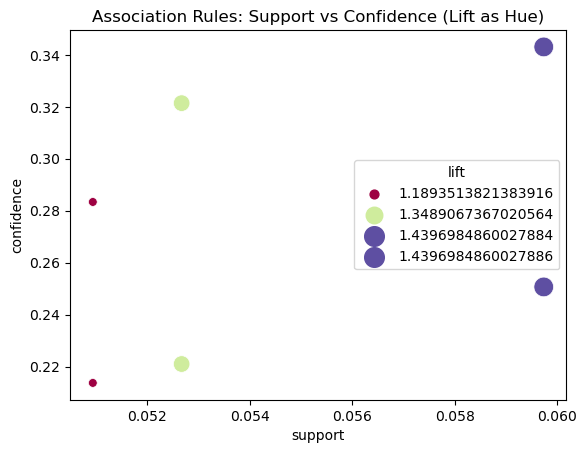

In [14]:
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', palette='Spectral', size ="lift", sizes= (40, 200))
plt.title('Association Rules: Support vs Confidence (Lift as Hue)')
plt.show()

In [15]:
# Lift greater than 1 shows positive association

In [17]:
print(rules.head(10))

       antecedents      consequents  antecedent support  consequent support  \
0      (chocolate)  (mineral water)            0.163867            0.238267   
1  (mineral water)      (chocolate)            0.238267            0.163867   
2           (eggs)  (mineral water)            0.179733            0.238267   
3  (mineral water)           (eggs)            0.238267            0.179733   
4      (spaghetti)  (mineral water)            0.174133            0.238267   
5  (mineral water)      (spaghetti)            0.238267            0.174133   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.052667    0.321400  1.348907               1.0  0.013623    1.122506   
1  0.052667    0.221041  1.348907               1.0  0.013623    1.073398   
2  0.050933    0.283383  1.189351               1.0  0.008109    1.062957   
3  0.050933    0.213766  1.189351               1.0  0.008109    1.043286   
4  0.059733    0.343032  1.439698               1.0  0.018243

1. What is Lift and Why is it Important?
Lift shows how two products are bought together compared to just by chance.

If lift is 1, it means no relationship — there are together randomly.

If lift is more than 1, it means buying one product increases the chance of buying the other.

2. What are Support and Confidence? How to Calculate Them?
Support: How often something happens in all transactions.
Support(A)= Number of transactions containing A / Total number of transactions 

Confidence: How often product B is bought when product A is bought.
Confidence(A→B)= Transactions with both A and B / Transactions with A

3. What are Some Limitations or Challenges?
a) It can take a long time to find rules if there are lots of products.

b) You might get a lot of rules that say the same thing, which can be confusing.
c) Mining rules can be very expensive with large datasets and many unique items because the number of possible itemsets grows exponentially.
d) The rules show what items are bought together, but not why.